# Course 10 Lab 5 - Exploring and Preparing Data

In [4]:
# import libraries
from tokenize import PlainToken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# get the data
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


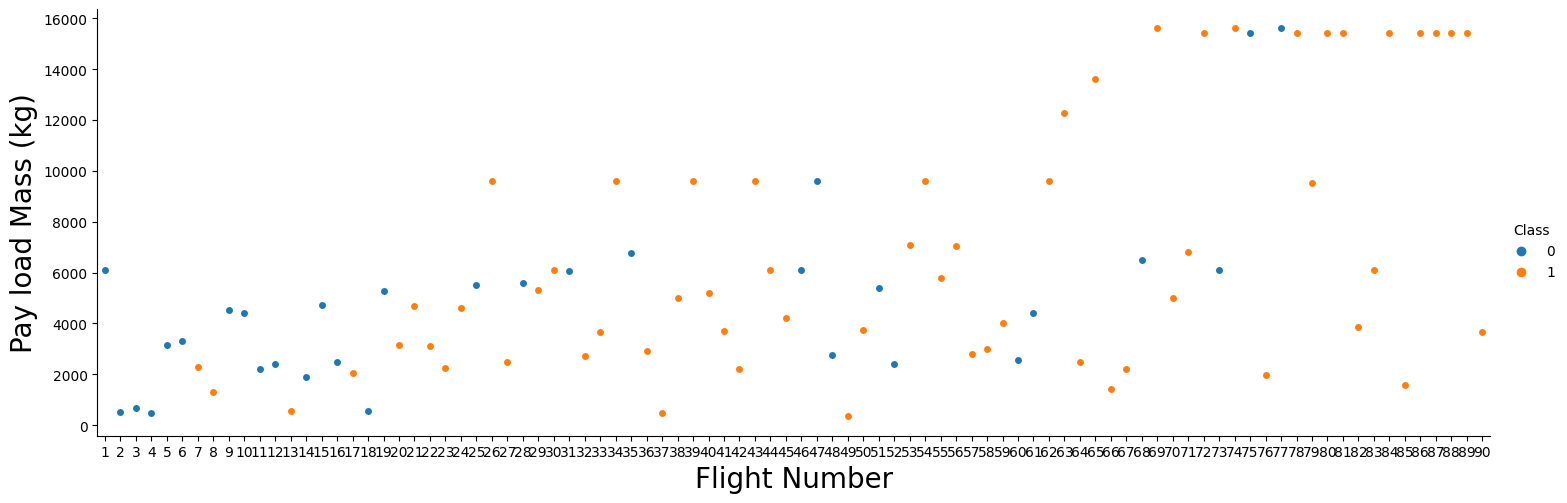

In [25]:
# plot FlightNumber vs PayLoadMass and overlay the outcome of the launch
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect=3)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Pay load Mass (kg)', fontsize = 20)
plt.show()

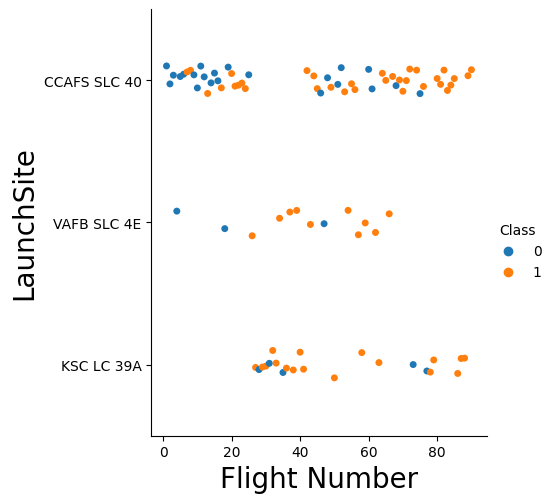

In [24]:
# plot flight number vs launch site and overlay class
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=1)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('LaunchSite', fontsize = 20)
plt.show()

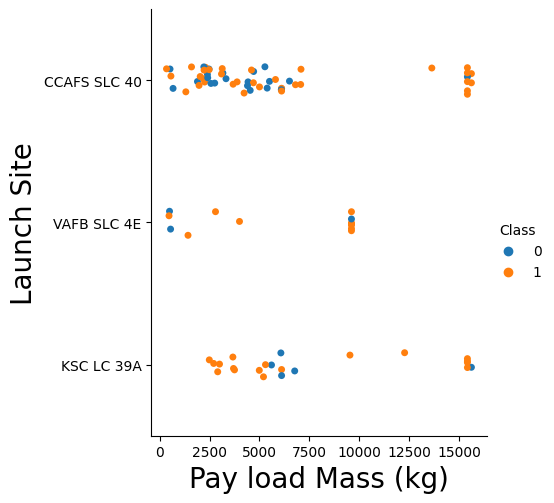

In [23]:
# plot Payload Mass vs Launchsite and overlay the outcome of the launch
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df, aspect=1)
plt.ylabel('Launch Site', fontsize = 20)
plt.xlabel('Pay load Mass (kg)', fontsize = 20)
plt.show()

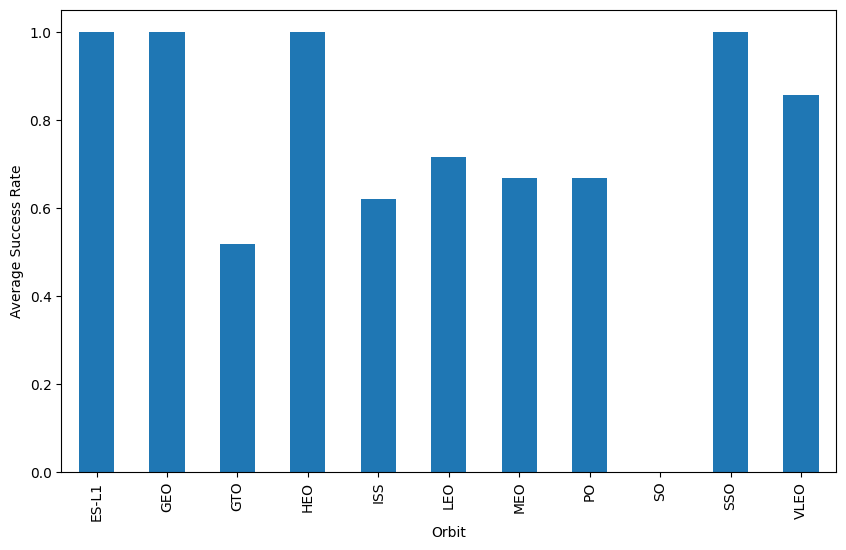

In [9]:
# create a bar chart for the successrate of each orbit
df2 = df.groupby(['Orbit'])['Class'].mean()
df2.plot(kind = 'bar',figsize = (10,6))
plt.xlabel('Orbit') 
plt.ylabel('Average Success Rate') 
plt.show()

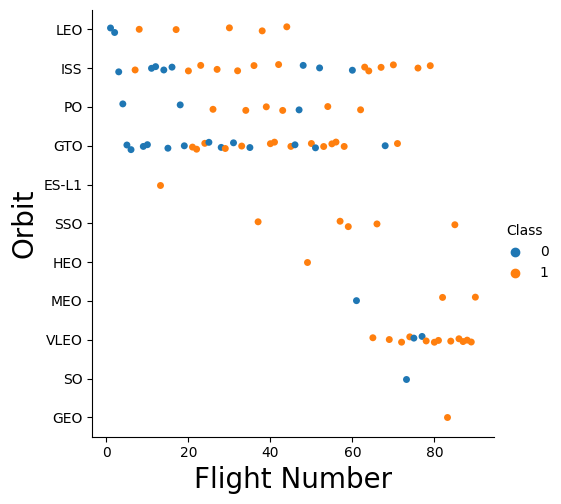

In [22]:
# plot a scatter point chart with x axis as FlightNumber and yaxis as Orbit, with hue as class value
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=df, aspect=1)
plt.ylabel('Orbit', fontsize = 20)
plt.xlabel('Flight Number', fontsize = 20)
plt.show()

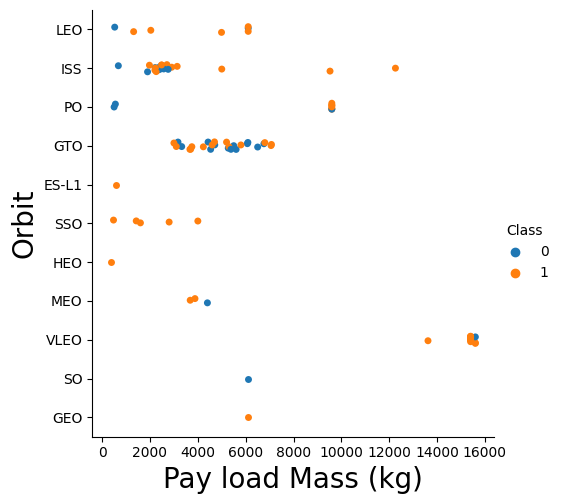

In [21]:
# plot a scatter plot with x axis as payload and y axis as orbit, with the hue as class
sns.catplot(y='Orbit', x='PayloadMass', hue='Class', data=df, aspect=1)
plt.ylabel('Orbit', fontsize = 20)
plt.xlabel('Pay load Mass (kg)', fontsize = 20)
plt.show()

In [12]:
# plot a line chart with x axis as year and y axis as average successrate 
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year(1)
df['Year']=year
average_by_year = df.groupby(by='Year').mean()
average_by_year.reset_index(inplace=True)

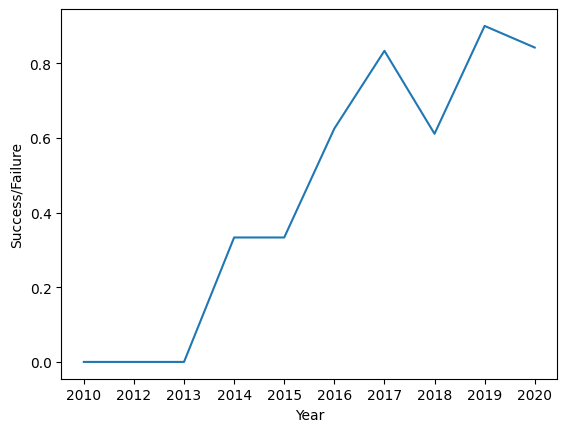

In [13]:
# plot
plt.plot(average_by_year['Year'], average_by_year['Class'])
plt.xlabel('Year')
plt.ylabel('Success/Failure')
plt.show()

In [14]:
# select the features that will be used in success prediction in the future model
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
# use the get_dummies function and features dataframe to apply onehotencoder to the columns orbits, launchsite, landingpad, and serial
# assign the value to the variable features_one_hot, display the result using head()
features_one_hot = pd.get_dummies(features, columns = ['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# cast the entire dataframe to variable type float64
features_one_hot = features_one_hot.astype('float64')

In [17]:
# save 
features_one_hot.to_csv('dataset_part_3.csv', index=False)